<a href="https://colab.research.google.com/github/jpnoxon/jpnoxon_64061_MachineLearning/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)


In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [6]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [10]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [12]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 42ms/step - loss: 0.5368 - accuracy: 0.7761 - val_loss: 0.3870 - val_accuracy: 0.8537
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2872 - accuracy: 0.9031 - val_loss: 0.2942 - val_accuracy: 0.8864
Epoch 3/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1981 - accuracy: 0.9337 - val_loss: 0.2797 - val_accuracy: 0.8881
Epoch 4/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1487 - accuracy: 0.9517 - val_loss: 0.2817 - val_accuracy: 0.8861
Epoch 5/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1148 - accuracy: 0.9679 - val_loss: 0.2976 - val_accuracy: 0.8846
Epoch 6/20
15/30 [==============>...............] - ETA: 0s - loss: 0.0890 - accuracy: 0.9780

KeyboardInterrupt: ignored

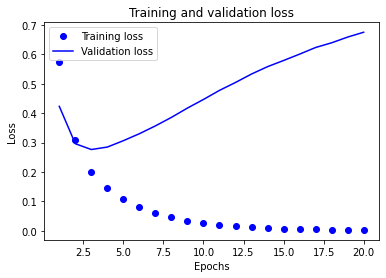

In [14]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

We can see that the easiest way to improve this model is by reducing the number of epochs

In [33]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 34ms/step - loss: 0.4446 - accuracy: 0.8174 - val_loss: 0.2766 - val_accuracy: 0.9160
Epoch 2/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2534 - accuracy: 0.9107 - val_loss: 0.1989 - val_accuracy: 0.9350
Epoch 3/4
49/49 [==============================] - 1s 29ms/step - loss: 0.1978 - accuracy: 0.9292 - val_loss: 0.1585 - val_accuracy: 0.9478
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2941 - accuracy: 0.8840


Even though model accuracy on training data is lower, validation accuracy has increased.  This is better since it means our model is not over fitted.  It will better predict general results

Next, let's test if batch size impacts validation & test accuracy

In [34]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=1024, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/4
25/25 [==============================] - 2s 70ms/step - loss: 0.5233 - accuracy: 0.7931 - val_loss: 0.3812 - val_accuracy: 0.8869
Epoch 2/4
25/25 [==============================] - 1s 56ms/step - loss: 0.3382 - accuracy: 0.8931 - val_loss: 0.2774 - val_accuracy: 0.9156
Epoch 3/4
25/25 [==============================] - 1s 56ms/step - loss: 0.2591 - accuracy: 0.9166 - val_loss: 0.2164 - val_accuracy: 0.9356
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2936 - accuracy: 0.8835


Doubling batch size has a neglible effect

In [18]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=2036, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/4
13/13 [==============================] - 2s 113ms/step - loss: 0.6095 - accuracy: 0.7228 - val_loss: 0.4991 - val_accuracy: 0.8465
Epoch 2/4
13/13 [==============================] - 1s 93ms/step - loss: 0.4521 - accuracy: 0.8650 - val_loss: 0.3835 - val_accuracy: 0.9049
Epoch 3/4
13/13 [==============================] - 1s 92ms/step - loss: 0.3567 - accuracy: 0.8997 - val_loss: 0.3216 - val_accuracy: 0.9127
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.3394 - accuracy: 0.8765


After doubling the batch size and then increasing the batch size by almost 4x, slightly increasing the batch size does not drastically increase model performance

In [15]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation= "relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 36ms/step - loss: 0.4759 - accuracy: 0.7969 - val_loss: 0.2885 - val_accuracy: 0.8966
Epoch 2/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2531 - accuracy: 0.9067 - val_loss: 0.2008 - val_accuracy: 0.9287
Epoch 3/4
49/49 [==============================] - 2s 31ms/step - loss: 0.1970 - accuracy: 0.9265 - val_loss: 0.1468 - val_accuracy: 0.9516
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.3369 - accuracy: 0.8729


Adding an exra layer increased validation accuracy

In [17]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 32ms/step - loss: 0.4661 - accuracy: 0.8154 - val_loss: 0.3033 - val_accuracy: 0.9013
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2671 - accuracy: 0.9089 - val_loss: 0.2198 - val_accuracy: 0.9309
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2104 - accuracy: 0.9298 - val_loss: 0.1803 - val_accuracy: 0.9448
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2850 - accuracy: 0.8866


removing a hidden layer did not have a significant impact

In [18]:
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 39ms/step - loss: 0.4467 - accuracy: 0.8224 - val_loss: 0.2709 - val_accuracy: 0.9110
Epoch 2/4
49/49 [==============================] - 2s 34ms/step - loss: 0.2423 - accuracy: 0.9170 - val_loss: 0.1927 - val_accuracy: 0.9377
Epoch 3/4
49/49 [==============================] - 2s 34ms/step - loss: 0.1877 - accuracy: 0.9358 - val_loss: 0.1542 - val_accuracy: 0.9534
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2982 - accuracy: 0.8807


adding nodes to the model increased validation accuracy

In [13]:
model = keras.Sequential([
    layers.Dense(8, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 34ms/step - loss: 0.4995 - accuracy: 0.7995 - val_loss: 0.3422 - val_accuracy: 0.8901
Epoch 2/4
49/49 [==============================] - 2s 35ms/step - loss: 0.3022 - accuracy: 0.9008 - val_loss: 0.2538 - val_accuracy: 0.9218
Epoch 3/4
49/49 [==============================] - 2s 30ms/step - loss: 0.2399 - accuracy: 0.9219 - val_loss: 0.2119 - val_accuracy: 0.9351
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2901 - accuracy: 0.8853


removing nodes slightly decrease validation accuracy


In [14]:
model = keras.Sequential([
    layers.Dense(8, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 34ms/step - loss: 0.5898 - accuracy: 0.7764 - val_loss: 0.4062 - val_accuracy: 0.8917
Epoch 2/4
49/49 [==============================] - 1s 30ms/step - loss: 0.3108 - accuracy: 0.9019 - val_loss: 0.2221 - val_accuracy: 0.9277
Epoch 3/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2070 - accuracy: 0.9288 - val_loss: 0.1641 - val_accuracy: 0.9476
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2945 - accuracy: 0.8846


adding additional layers and alternating node size increased validation accuracy

In [12]:
model = keras.Sequential([
    layers.Dense(8, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 47ms/step - loss: 0.2056 - accuracy: 0.6697 - val_loss: 0.1451 - val_accuracy: 0.8638
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.1009 - accuracy: 0.8969 - val_loss: 0.0619 - val_accuracy: 0.9321
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.0569 - accuracy: 0.9322 - val_loss: 0.0424 - val_accuracy: 0.9554
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.0887 - accuracy: 0.8814


using mse instead of binary cross entropy slight increased validation accuracy 

In [16]:
model = keras.Sequential([
    layers.Dense(8, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(8, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 32ms/step - loss: 0.1620 - accuracy: 0.8083 - val_loss: 0.0898 - val_accuracy: 0.9002
Epoch 2/4
49/49 [==============================] - 1s 26ms/step - loss: 0.0749 - accuracy: 0.9113 - val_loss: 0.0526 - val_accuracy: 0.9432
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.0507 - accuracy: 0.9411 - val_loss: 0.0392 - val_accuracy: 0.9604
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.0906 - accuracy: 0.8798


I ran the model results several times using tanh and MSE together and it increase validation accuracy a decent amount